Call Option Price: 10.45
Greeks:
Delta: 0.6368
Gamma: 0.0188
Theta: -6.4140
Vega: 0.3752
Rho: 0.5323


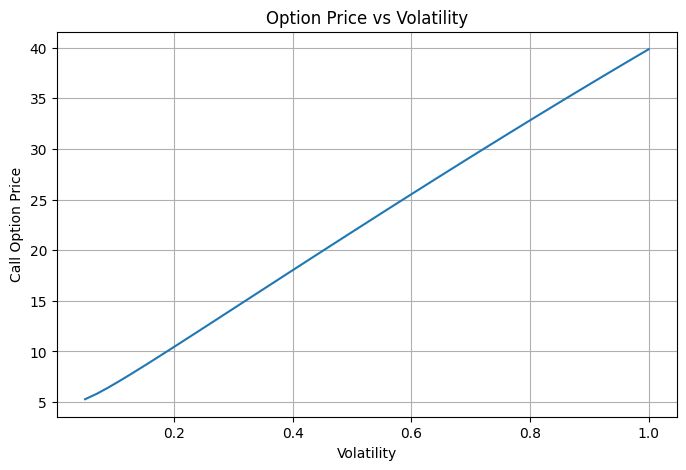

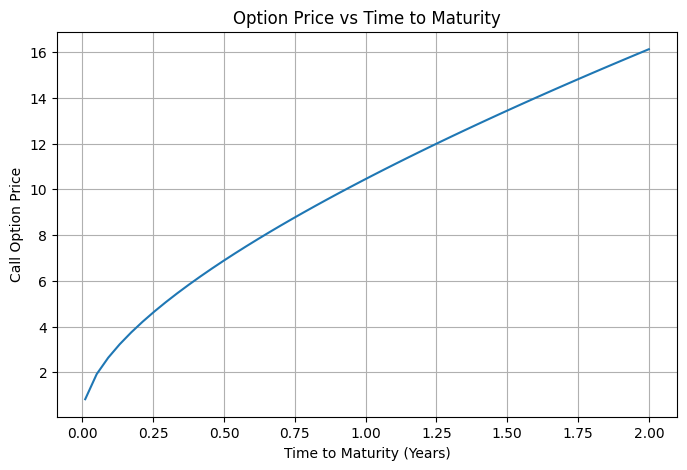

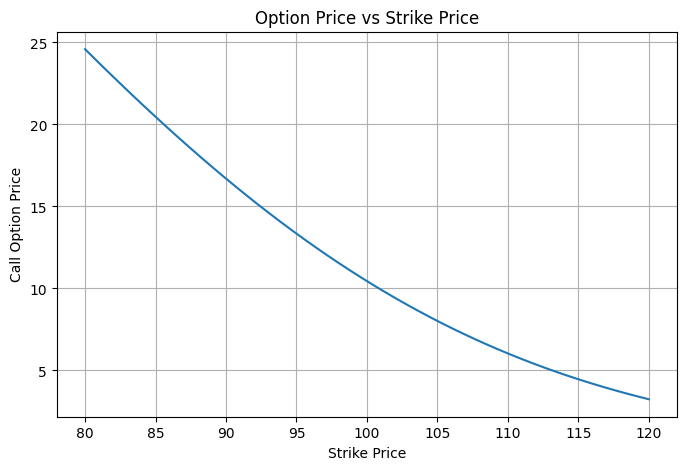

In [1]:
!pip install matplotlib scipy


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

def black_scholes_price(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("option_type must be 'call' or 'put'")

def calculate_greeks(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    delta = norm.cdf(d1)
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    theta = (-S * norm.pdf(d1) * sigma / (2 * np.sqrt(T))
             - r * K * np.exp(-r * T) * norm.cdf(d2))
    vega = S * norm.pdf(d1) * np.sqrt(T)
    rho = K * T * np.exp(-r * T) * norm.cdf(d2)

    return {
        'Delta': delta,
        'Gamma': gamma,
        'Theta': theta,
        'Vega': vega / 100,  # per 1% change
        'Rho': rho / 100     # per 1% change
    }


S = 100
K = 100
T = 1
r = 0.05
sigma = 0.2

call_price = black_scholes_price(S, K, T, r, sigma, option_type='call')
greeks = calculate_greeks(S, K, T, r, sigma)

print(f"Call Option Price: {call_price:.2f}")
print("Greeks:")
for k, v in greeks.items():
    print(f"{k}: {v:.4f}")

volatilities = np.linspace(0.05, 1.0, 50)
prices_vol = [black_scholes_price(S, K, T, r, vol) for vol in volatilities]

plt.figure(figsize=(8, 5))
plt.plot(volatilities, prices_vol)
plt.title("Option Price vs Volatility")
plt.xlabel("Volatility")
plt.ylabel("Call Option Price")
plt.grid(True)
plt.show()

T_values = np.linspace(0.01, 2, 50)
prices_T = [black_scholes_price(S, K, t, r, sigma) for t in T_values]

plt.figure(figsize=(8, 5))
plt.plot(T_values, prices_T)
plt.title("Option Price vs Time to Maturity")
plt.xlabel("Time to Maturity (Years)")
plt.ylabel("Call Option Price")
plt.grid(True)
plt.show()

K_values = np.linspace(80, 120, 50)
prices_K = [black_scholes_price(S, k, T, r, sigma) for k in K_values]

plt.figure(figsize=(8, 5))
plt.plot(K_values, prices_K)
plt.title("Option Price vs Strike Price")
plt.xlabel("Strike Price")
plt.ylabel("Call Option Price")
plt.grid(True)
plt.show()